In [1]:
!pip install category_encoders
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline
sns.set(color_codes=True)
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PowerTransformer
import scipy.stats as stats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.2 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sleep_Data_Sampled.csv')

 Data Understanding and Observation

Checking Data shape
Get summary statistics (count, mean, std, min, max, percentiles) for all numerical columns.


In [5]:
print("Dataset Shape:", df.shape)

print("\nSummary Statistics:\n", df.describe())
print("\nInfor", df.info())

Dataset Shape: (15000, 13)

Summary Statistics:
           Person ID           Age  Sleep Duration  Quality of Sleep  \
count  15000.000000  15000.000000    15000.000000      15000.000000   
mean    7500.500000     44.130667        6.997327          7.131267   
std     4330.271354      6.840091        0.615187          1.053111   
min        1.000000     27.000000        5.800000          4.000000   
25%     3750.750000     40.000000        6.500000          6.000000   
50%     7500.500000     44.000000        7.000000          7.000000   
75%    11250.250000     48.000000        7.450000          8.000000   
max    15000.000000     59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level    Heart Rate   Daily Steps  
count             15000.000000  15000.000000  15000.000000  15000.000000  
mean                 59.925000      5.654800     70.857533   6795.080000  
std                  16.814374      1.393568      3.614836   1329.706484  
min        

1. Find Missing Values




In [6]:
missing_summary = df.isnull().sum()
print("Missing Values per Column:\n", missing_summary)

Missing Values per Column:
 Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


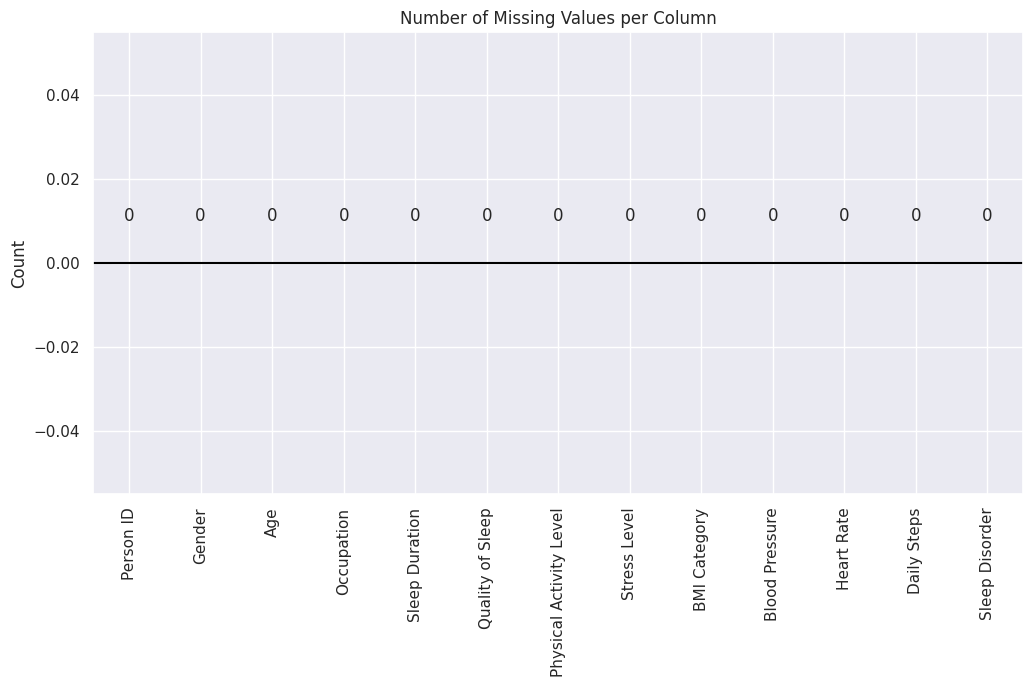

In [7]:
# Another effective visualization: a bar plot of the null counts
null_counts = df.isnull().sum()
plt.figure(figsize=(12, 6))
null_plot = null_counts.plot(kind='bar')
plt.title("Number of Missing Values per Column")
plt.ylabel("Count")
plt.axhline(y=0, color='black', linestyle='-') # This line will be at zero
# Annotate the bars with the value (which is 0)
for i, v in enumerate(null_counts):
    null_plot.text(i, v + 0.01, str(v), ha='center')
plt.show()

Created a heatmap and a bar plot. The heatmap is a uniform color, with no light-colored bars, confirming no missing data. Similarly, the bar plot shows all counts at zero for every column. This proves that the step of imputation or deletion for missing values was not necessary for our dataset.

*1.1* Find Duplicates

In [8]:
full_duplicates = df.duplicated().sum()
print("Number of Full-Row Duplicates:", full_duplicates)
df = df.drop_duplicates()

Number of Full-Row Duplicates: 0


In [9]:
if 'Person ID' in df.columns:
    key_duplicates = df.duplicated(subset=['Person ID']).sum()
    print("Number of Key-Based Duplicates (on Person ID):", key_duplicates)
    df = df.drop_duplicates(subset=['Person ID'], keep='first')

print("\nDataset Shape After Removing Duplicates:", df.shape)

Number of Key-Based Duplicates (on Person ID): 0

Dataset Shape After Removing Duplicates: (15000, 13)


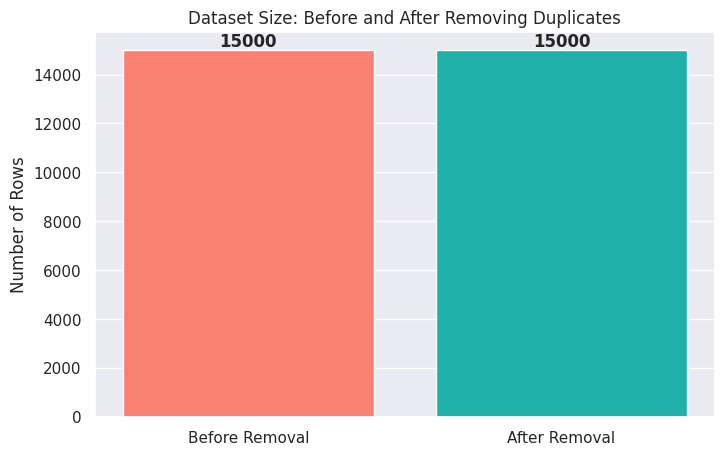

In [10]:
import matplotlib.pyplot as plt

# Data for the plot: BEFORE and AFTER
status = ['Before Removal', 'After Removal']
rows = [len(df), len(df)] # Use the original and cleaned DataFrames

# Create the bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(status, rows, color=['salmon', 'lightseagreen'])

plt.title('Dataset Size: Before and After Removing Duplicates')
plt.ylabel('Number of Rows')

# Add the exact numbers on top of the bars
for bar, value in zip(bars, rows):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{value}',
             ha='center', va='bottom', fontweight='bold')

plt.show()

created a bar plot to visualize the number of rows

---

before and after the deduplication process.

1.3 Check for NaN-like Values in Categorical Columns

In [11]:
categorical_cols = df.select_dtypes(include='object').columns
# Check for various forms of missing values in each categorical column
for col in categorical_cols:
    # Check for actual NaN and also string versions
    na_count = df[col].isna().sum()
    nan_string_count = (df[col].astype(str).str.strip().str.lower() == 'nan').sum()
    null_string_count = (df[col].astype(str).str.strip().str.lower() == 'null').sum()
    na_string_count = (df[col].astype(str).str.strip().str.lower() == 'n/a').sum()

    total_missing = na_count + nan_string_count + null_string_count + na_string_count

    print(f"Column: {col}")
    print(f"  - Actual NaN values: {na_count}")
    print(f"  - 'nan' strings: {nan_string_count}")
    print(f"  - 'null' strings: {null_string_count}")
    print(f"  - 'n/a' strings: {na_string_count}")
    print(f"  → Total missing-like values: {total_missing}\n")

Column: Gender
  - Actual NaN values: 0
  - 'nan' strings: 0
  - 'null' strings: 0
  - 'n/a' strings: 0
  → Total missing-like values: 0

Column: Occupation
  - Actual NaN values: 0
  - 'nan' strings: 0
  - 'null' strings: 0
  - 'n/a' strings: 0
  → Total missing-like values: 0

Column: BMI Category
  - Actual NaN values: 0
  - 'nan' strings: 0
  - 'null' strings: 0
  - 'n/a' strings: 0
  → Total missing-like values: 0

Column: Blood Pressure
  - Actual NaN values: 0
  - 'nan' strings: 0
  - 'null' strings: 0
  - 'n/a' strings: 0
  → Total missing-like values: 0

Column: Sleep Disorder
  - Actual NaN values: 0
  - 'nan' strings: 0
  - 'null' strings: 0
  - 'n/a' strings: 0
  → Total missing-like values: 0



In [12]:
# Get the count for each category, least frequent first
occupation_counts_asc = df['Occupation'].value_counts(ascending=True)
print(occupation_counts_asc)

Occupation
Manager                   22
Sales Representative     115
Software Engineer        132
Scientist                193
Accountant              1134
Lawyer                  1340
Engineer                1719
Doctor                  1856
Salesperson             1974
Teacher                 2199
Nurse                   4316
Name: count, dtype: int64


2. Data Validation

In [14]:
df['Age'] = df['Age'].apply(lambda x: x if 18 <= x <= 100 else np.nan)

df['Sleep Duration'] = df['Sleep Duration'].apply(lambda x: x if 0 < x <= 24 else np.nan)

df['Quality of Sleep'] = df['Quality of Sleep'].apply(lambda x: x if 1 <= x <= 10 else np.nan)

df['Stress Level'] = df['Stress Level'].apply(lambda x: x if 1 <= x <= 10 else np.nan)

allowed_bmi = ['Normal', 'Normal Weight', 'Overweight', 'Obese']
df['BMI Category'] = df['BMI Category'].apply(lambda x: x if x in allowed_bmi else 'Unknown')

In [15]:
def validate_bp(bp):
    if isinstance(bp, str) and '/' in bp:
        sys, dia = bp.split('/')
        try:
            sys, dia = int(sys), int(dia)
            if 90 <= sys <= 180 and 60 <= dia <= 120:
                return bp
        except:
            pass
    return np.nan

In [17]:
df['Blood Pressure'] = df['Blood Pressure'].apply(validate_bp)

In [16]:
df['Heart Rate'] = df['Heart Rate'].apply(lambda x: x if 40 <= x <= 100 else np.nan)

df['Daily Steps'] = df['Daily Steps'].apply(lambda x: x if 0 < x <= 20000 else np.nan)

allowed_disorders = ['Healthy', 'Insomnia', 'Sleep Apnea']
df['Sleep Disorder'] = df['Sleep Disorder'].apply(lambda x: x if x in allowed_disorders else 'Unknown')

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)


df = df.dropna()

print("Dataset Shape After Fixing Invalid Entries:", df.shape)

Dataset Shape After Fixing Invalid Entries: (15000, 13)


**After Validation**

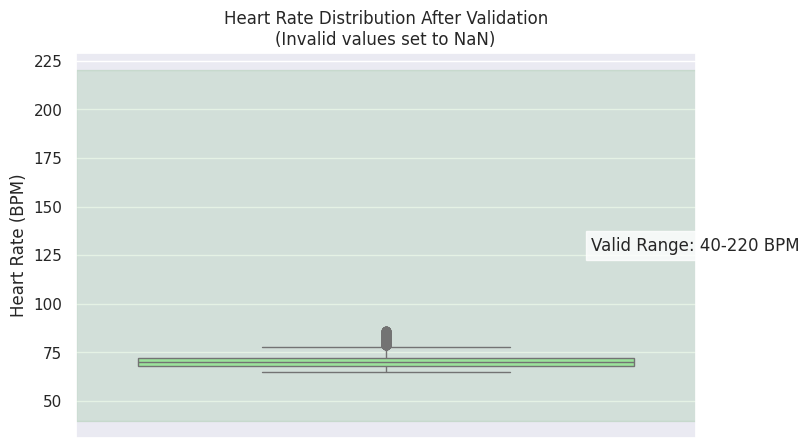

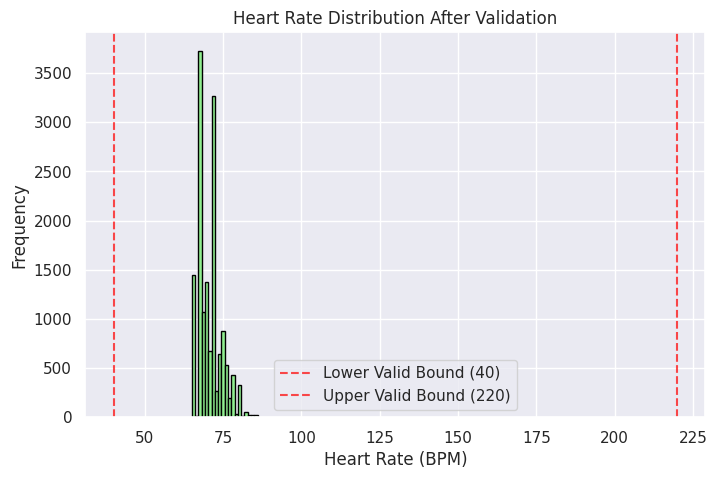

In [18]:
# Heart Rate - After Validation Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Heart Rate'], color='lightgreen')
plt.title('Heart Rate Distribution After Validation\n(Invalid values set to NaN)')
plt.ylabel('Heart Rate (BPM)')
# Add text annotation with the valid range
plt.axhspan(40, 220, alpha=0.1, color='green') # Highlight the valid range
plt.text(0.5, 130, 'Valid Range: 40-220 BPM', ha='center', va='center',
         bbox=dict(facecolor='white', alpha=0.8))
plt.show()

# Heart Rate - After Validation Histogram
plt.figure(figsize=(8, 5))
plt.hist(df['Heart Rate'].dropna(), bins=20, color='lightgreen', edgecolor='black')
plt.title('Heart Rate Distribution After Validation')
plt.xlabel('Heart Rate (BPM)')
plt.ylabel('Frequency')
plt.axvline(40, color='red', linestyle='--', alpha=0.7, label='Lower Valid Bound (40)')
plt.axvline(220, color='red', linestyle='--', alpha=0.7, label='Upper Valid Bound (220)')
plt.legend()
plt.show()

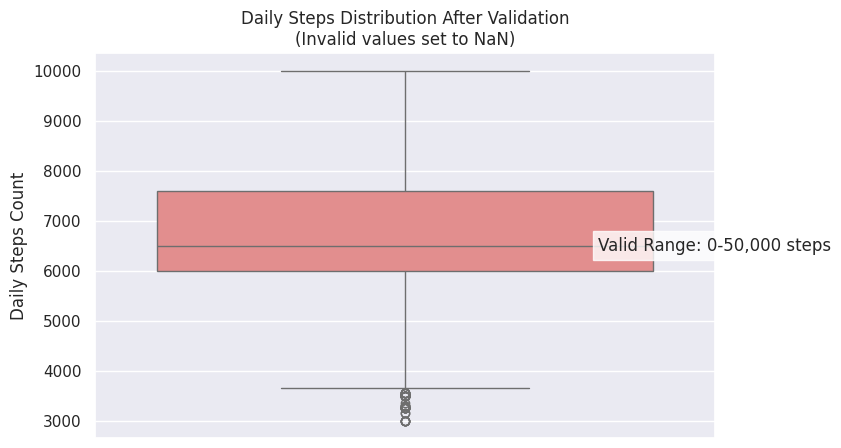

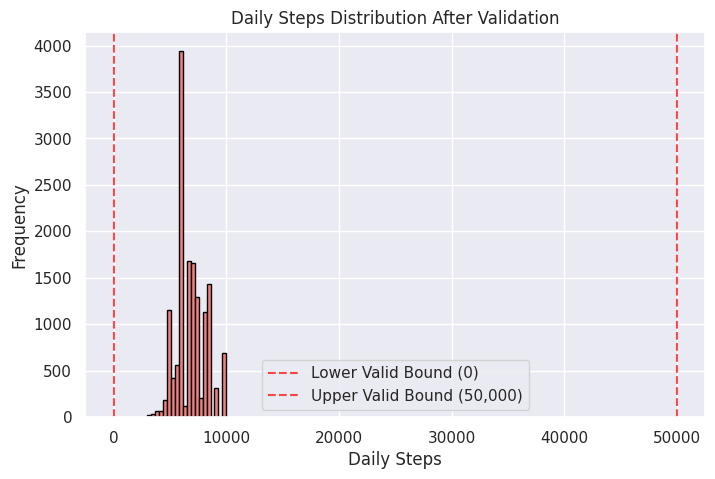

In [19]:
# Daily Steps - After Validation Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Daily Steps'], color='lightcoral')
plt.title('Daily Steps Distribution After Validation\n(Invalid values set to NaN)')
plt.ylabel('Daily Steps Count')
# Add text annotation with the valid range
plt.text(0.5, df['Daily Steps'].median(), f'Valid Range: 0-50,000 steps',
         ha='center', va='center', bbox=dict(facecolor='white', alpha=0.8))
plt.show()

# Daily Steps - After Validation Histogram
plt.figure(figsize=(8, 5))
plt.hist(df['Daily Steps'].dropna(), bins=20, color='lightcoral', edgecolor='black')
plt.title('Daily Steps Distribution After Validation')
plt.xlabel('Daily Steps')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--', alpha=0.7, label='Lower Valid Bound (0)')
plt.axvline(50000, color='red', linestyle='--', alpha=0.7, label='Upper Valid Bound (50,000)')
plt.legend()
plt.show()

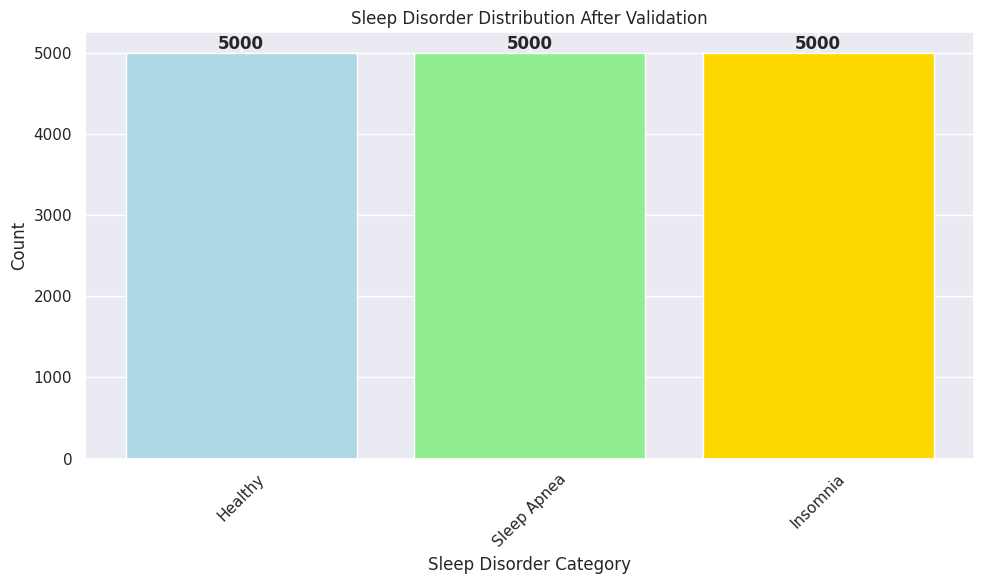

In [20]:
# Sleep Disorder - After Validation Bar Chart
plt.figure(figsize=(10, 6))
disorder_counts = df['Sleep Disorder'].value_counts()
colors = ['lightblue', 'lightgreen', 'gold', 'lightcoral'] # Different colors for each category

bars = plt.bar(disorder_counts.index, disorder_counts.values, color=colors[:len(disorder_counts)])

plt.title('Sleep Disorder Distribution After Validation')
plt.xlabel('Sleep Disorder Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add value labels on top of each bar
for bar, value in zip(bars, disorder_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{value}',
             ha='center', va='bottom', fontweight='bold')

# Add a special annotation for the 'Unknown' category if it exists
if 'Unknown' in disorder_counts.index:
    unknown_index = list(disorder_counts.index).index('Unknown')
    plt.text(unknown_index, disorder_counts['Unknown']/2, 'Invalid Values\nMapped Here',
             ha='center', va='center', fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [21]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,35,Doctor,6.65,7,50,7,Normal Weight,120/80,71,7100,Healthy
1,2,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy
2,3,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy
3,4,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy
4,5,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy
